In [1]:
import numpy, pandas, quandl

In [2]:
import numpy as np 
import pandas as pd
import quandl
from pylab import mpl, plt
plt.style.use('seaborn')
%matplotlib inline
import pandas_datareader.data as web
import datetime
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
import statsmodels.formula.api as smf

quandl.ApiConfig.api_key = "pTygJpdkhxBLRczvBgTp"


In [25]:
# import S&P 500 Prices and % Change from Excel 
names= ['Date','Adjusted Close', '% Change']
df = pd.read_excel('SP500 Prices.xlsx', names=['Date','Adjusted Close','% Change'])
df.head()


df = pd.read_excel('SP500 Prices.xlsx', names=names, index_col='Date')
df.head()


df = (df.sort_values(by=['Date']))

df.tail()




,Adjusted Close,% Change
Date,,
2020-08-31,3500.31,7.006469
2020-09-30,3363.00,-3.922795
2020-10-30,3269.96,-2.766577
2020-11-30,3621.63,10.754566
2020-12-31,3756.07,3.712141


In [27]:
# import ISM PMI from Eccel
names= ['Date','% Change IP']
data = pd.read_excel('IP Change.xlsx', names=names, index_col='Date')
data.head()


data = data.loc[:,['% Change IP']]
data


,% Change IP
Date,
2020-12-31,0.0102
2020-11-30,0.0089
2020-10-30,0.0101
2020-09-30,-0.0008
2020-08-31,0.0096
...,...
1970-05-29,-0.0012
1970-04-30,-0.0026
1970-03-31,-0.0013


In [5]:
# Reduce S&P 500 data to monthly adjusted Close prices
df = df.loc[:,['Adjusted Close']]
df.head()

,Adjusted Close
Date,
1970-01-30,85.02
1970-02-27,89.50
1970-03-31,89.63
1970-04-30,81.52
1970-05-29,76.55


In [6]:
# Compute returns from Price Series of S&P 500
df_Performance = df.pct_change()
df_Performance.head()



,Adjusted Close
Date,
1970-01-30,NaN
1970-02-27,0.052693
1970-03-31,0.001453
1970-04-30,-0.090483
1970-05-29,-0.060967


In [7]:
# Merge returns SPX, Change PMI
Overview = pd.concat([df_Performance,data], axis=1)
Overview.fillna(0)
Overview = Overview.fillna(0)
Overview


,Adjusted Close,% Change IP
Date,,
1970-01-30,0.000000,-0.0185
1970-02-27,0.052693,-0.0007
1970-03-31,0.001453,-0.0013
1970-04-30,-0.090483,-0.0026
1970-05-29,-0.060967,-0.0012
...,...,...
2020-08-31,0.070065,0.0096
2020-09-30,-0.039228,-0.0008
2020-10-30,-0.027666,0.0101


In [8]:
# Merge monthly S&P 500 performance, PMI and monthly PMI changes into a table
Overview2 = pd.concat([df_Performance,data], axis=1, names=['Adjusted Close','% Change IP'])
Overview2 = Overview2.fillna(0)
Overview2

print(Overview2)
Overview2

            Adjusted Close  % Change IP
Date                                   
1970-01-30        0.000000      -0.0185
1970-02-27        0.052693      -0.0007
1970-03-31        0.001453      -0.0013
1970-04-30       -0.090483      -0.0026
1970-05-29       -0.060967      -0.0012
...                    ...          ...
2020-08-31        0.070065       0.0096
2020-09-30       -0.039228      -0.0008
2020-10-30       -0.027666       0.0101
2020-11-30        0.107546       0.0089
2020-12-31        0.037121       0.0102

[612 rows x 2 columns]


,Adjusted Close,% Change IP
Date,,
1970-01-30,0.000000,-0.0185
1970-02-27,0.052693,-0.0007
1970-03-31,0.001453,-0.0013
1970-04-30,-0.090483,-0.0026
1970-05-29,-0.060967,-0.0012
...,...,...
2020-08-31,0.070065,0.0096
2020-09-30,-0.039228,-0.0008
2020-10-30,-0.027666,0.0101


In [9]:
# Estimate OlS Regression on returns SPX and Change PMI
Overview_df = sm.add_constant(Overview)
Overview_df.head()

,const,Adjusted Close,% Change IP
Date,,,
1970-01-30,1.0,0.000000,-0.0185
1970-02-27,1.0,0.052693,-0.0007
1970-03-31,1.0,0.001453,-0.0013
1970-04-30,1.0,-0.090483,-0.0026
1970-05-29,1.0,-0.060967,-0.0012


In [28]:
# Regression SPX return and PMI % change
model = sm.OLS(Overview_df['Adjusted Close'], Overview_df['% Change IP'], missing='drop')
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Adjusted Close   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                            0.03827
Date:                Tue, 18 May 2021   Prob (F-statistic):                       0.845
Time:                        22:26:44   Log-Likelihood:                          1036.1
No. Observations:                 612   AIC:                                     -2070.
Df Residuals:                     611   BIC:                                     -2066.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [14]:
# Regression SPX return and PMI Change
yx = Overview_df['Adjusted Close']
x2 = Overview_df['% Change IP']
x = x = sm.add_constant(x)
results3 = sm. OLS(yx,x2).fit()
results3.summary()

NameError: name 'x' is not defined

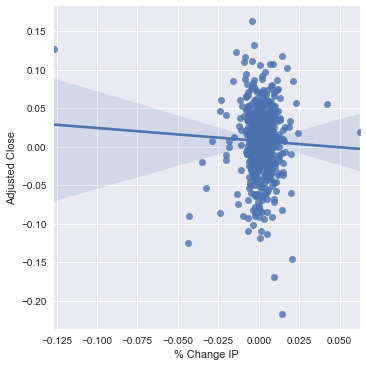

In [24]:
sns.lmplot(y="Adjusted Close", x="% Change IP", data=Overview);

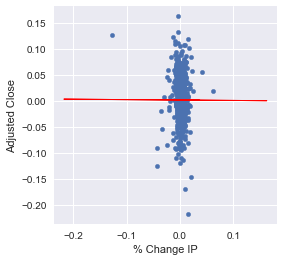

In [23]:
reg = np.polyfit(Overview['Adjusted Close'], Overview['% Change IP'], deg=1)
ax = Overview.plot(kind='scatter', y='Adjusted Close', x='% Change IP', figsize=(4, 4))
ax.plot(Overview['Adjusted Close'], np.polyval(reg, Overview['Adjusted Close']), 'r', lw=1
    )

Text(0, 0.5, '% Change IP')

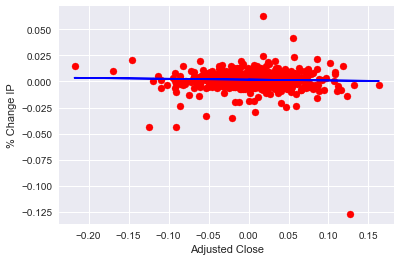

In [17]:
x = Overview[['Adjusted Close']]
y = Overview[['% Change IP']]

regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)

plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.xlabel('Adjusted Close')
plt.ylabel('% Change IP')


In [29]:
# Compute Correlation between PMI Change and SPX monthly retunrs
Overview.corr()

,Adjusted Close,% Change IP
Adjusted Close,1.000000,-0.036264
% Change IP,-0.036264,1.000000


In [ ]:
Overview2


In [12]:
# derive SPX returns from PMI 45-50, if PMI is increasing
OV45_50_pos = Overview2[Overview2['PMI'].between(45,50)]
OV45_50_pos = OV45_50_pos[OV45_50_pos['% Change IP'] > 0]

OV45_50_pos.head()
return45_50_pos = OV45_50_pos.loc[:,'Adjusted Close']
return45_50_pos.mean()

return45_50_pos.mean()


KeyError: 'PMI'

In [ ]:
# derive SPX returns from PMI 45-50, if PMI is decreasing
OV45_50_neg = Overview2[Overview2['PMI'].between(45,50)]
OV45_50_neg = OV45_50_neg[OV45_50_neg['% Change PMI'] < 0]

return45_50_neg = OV45_50_neg.loc[:,'Adjusted Close']
return45_50_neg.mean()

In [ ]:
# derive SPX returns from PMI 40-45, if PMI is increasing
OV40_45_pos = Overview2[Overview2['PMI'].between(40,45)]
OV40_45_pos = OV40_45_pos[OV40_45_pos['% Change PMI'] > 0]

return40_45_pos = OV40_45_pos.loc[:,'Adjusted Close']


return



In [ ]:
# derive SPX returns from PMI 40-45, if PMI is decreasing
OV40_45_neg = Overview2[Overview2['PMI'].between(40,45)]
OV40_45_neg = OV40_45_neg[OV40_45_neg['% Change PMI'] < 0]

return40_45_neg = OV40_45_neg.loc[:,'Adjusted Close']
return40_45_neg.mean()

In [ ]:
# derive SPX returns from PMI 50-55, if PMI is increasing

OV50_55_pos = Overview2[Overview2['PMI'].between(50,55)]
OV50_55_pos = OV50_55_pos[OV50_55_pos['% Change PMI'] > 0]

return50_55_pos = OV50_55_pos.loc[:,'Adjusted Close']
return50_55_pos.mean()

# result of 0.77% correct, double checked with excel


In [ ]:
# derive SPX returns from PMI 50-55, if PMI is decreasing

OV50_55_neg = Overview2[Overview2['PMI'].between(50,55)]
OV50_55_neg = OV50_55_neg[OV50_55_neg['% Change PMI'] < 0]

return50_55_neg = OV50_55_neg.loc[:,'Adjusted Close']
return50_55_neg.mean()

In [ ]:
# derive SPX returns from PMI 55-60, if PMI is increasing

OV55_60_pos = Overview2[Overview2['PMI'].between(55,60)]
OV55_60_pos = OV55_60_pos[OV55_60_pos['% Change PMI'] > 0]

return55_60_pos = OV55_60_pos.loc[:,'Adjusted Close']

return55_60_pos.mean()



In [ ]:
# derive SPX returns from PMI 55-60, if PMI is decreasing

OV55_60_neg = Overview2[Overview2['PMI'].between(55,60)]
OV55_60_neg = OV55_60_neg[OV55_60_neg['% Change PMI'] < 0]

return55_60_neg = OV55_60_neg.loc[:,'Adjusted Close']

return55_60_neg.mean()

In [ ]:
# derive SPX returns from PMI below 50, if PMI is increasing
OV0_50_pos = Overview2[Overview2['PMI'].between(0,50)]
OV0_50_pos = OV0_50_pos[OV0_50_pos['% Change PMI'] > 0]

return0_50_pos = OV0_50_pos.loc[:,'Adjusted Close']

return0_50_pos.mean()



In [ ]:
# derive SPX returns from PMI below 50, if PMI is decreasing

OV0_50_neg = Overview2[Overview2['PMI'].between(0,50)]
OV0_50_neg = OV0_50_neg[OV0_50_neg['% Change PMI'] < 0]

return0_50_neg = OV0_50_neg.loc[:,'Adjusted Close']
return0_50_neg.mean()


In [ ]:
# derive SPX returns from PMI above 50, if PMI is increasing

OV50_100_pos = Overview2[Overview2['PMI'].between(50,100)]
OV50_100_pos = OV50_100_pos[OV50_100_pos['% Change PMI'] > 0]

return50_100_pos = OV50_100_pos.loc[:,'Adjusted Close']
return50_100_pos.mean()

In [ ]:
# derive SPX returns from PMI above 50, if PMI is decreasing

OV50_100_neg = Overview2[Overview2['PMI'].between(50,100)]
OV50_100_neg = OV50_100_neg[OV50_100_neg['% Change PMI'] < 0]

return50_100_neg = OV50_100_neg.loc[:,'Adjusted Close']
return50_100_neg.mean()

In [ ]:
# Now, use IP Change as controll varible to see impact

In [ ]:
IP_Change = pd.read_excel('IP Change.xlsx', index_col='Date')
IP_Change

In [ ]:
# Prepare PMI Change +/- for dummy
PMI_pos = Overview2[Overview2['% Change PMI'] > 0]
PMI_pos = PMI_pos.loc[:,['% Change PMI']]
PMI_pos

PMI_neg = Overview2[Overview2['% Change PMI'] < 0], rename=PMI_neg
PMI_neg = PMI_neg.loc[:,['% Change PMI']]
PMI_neg

In [ ]:
# Merge SPX Performance / PMI Change and IP Change
Overview3 = pd.concat([df_Performance,data1,IP_Change], axis=1)
Overview3 = Overview3.dropna()


In [ ]:
print(Overview3)


In [ ]:
# Create dummy for PMI Change where 1 is rising PMI and 0 decreasing PMI
pd.get_dummies
Overview3['dummy'] = 0
for i in range(0,len(Overview3)): 
    if Overview3["% Change PMI"][i] > 0:
        Overview3['dummy'][i] = 1
        
        
        
        
print(Overview3)



In [ ]:
PMI_dummy = Overview3['dummy']
PMI_dummy

In [ ]:
Overview4 = pd.concat([df_Performance,data1,IP_Change,PMI_dummy], axis=1)
Overview4 = Overview4.dropna()
print(Overview4)


In [ ]:

y = Overview4['Adjusted Close']
x1 = Overview4[['% Change IP','dummy']]
x = x = sm.add_constant(x1)
results2 = sm. OLS(y,x).fit()
results2.summary()

In [ ]:
Overview4.describe()